In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


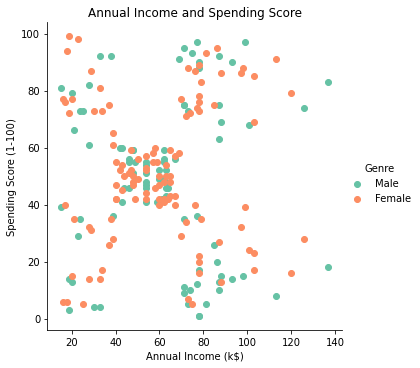

In [11]:
sns.FacetGrid(data,hue='Genre',size=5,palette='Set2').map(plt.scatter,'Annual Income (k$)','Spending Score (1-100)').add_legend()
plt.title('Annual Income and Spending Score')
plt.show()

In [24]:
data=data.drop(columns='CustomerID')

KeyError: "['CustomerID'] not found in axis"

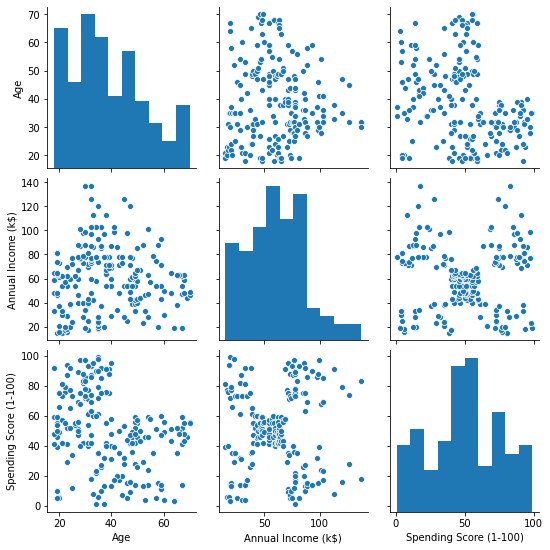

In [25]:
sns.pairplot(data,kind='scatter')

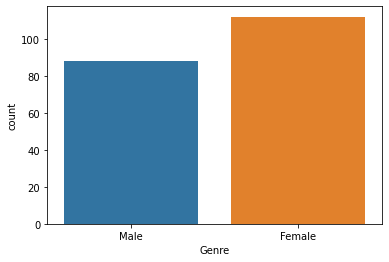

In [27]:
sns.countplot(data['Genre'])

In [37]:
def dist(a):
    sns.FacetGrid(data,height=6).map(sns.distplot,a).add_legend()
    

In [38]:
data.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

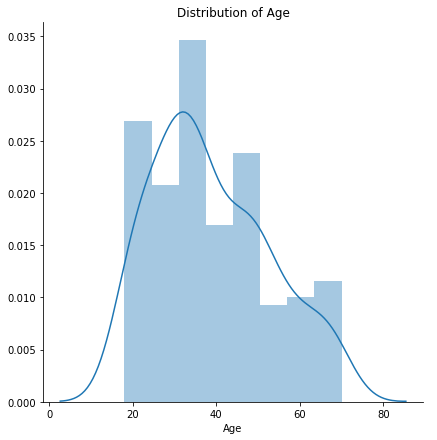

In [42]:
dist('Age')
plt.title('Distribution of Age')
plt.show()

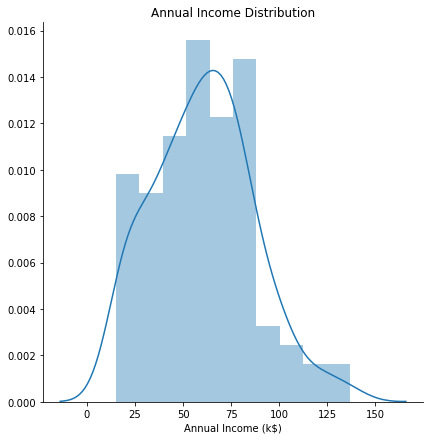

In [43]:
dist('Annual Income (k$)')
plt.title('Annual Income Distribution')
plt.show()

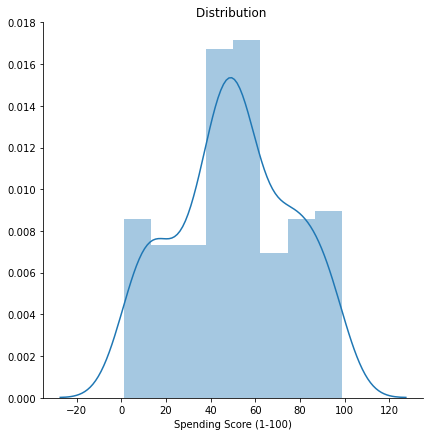

In [45]:
dist('Spending Score (1-100)')
plt.title('Distribution ')
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Genre']=le.fit_transform(data['Genre'])

Checking the optimal number of Clustures.

In [50]:
from sklearn.cluster import KMeans

In [71]:
inertias = []
for i in range(1, 15):
    km = KMeans(n_clusters=i).fit(data)
    inertias.append(km.inertia_)

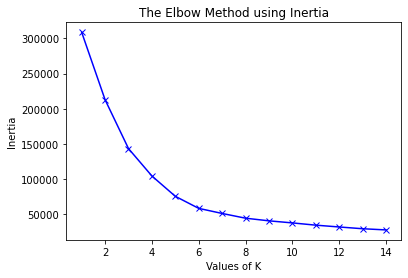

In [73]:
plt.plot(range(1, 15), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Text(0.5, 1.0, 'Customer segmentation by 3 groups')

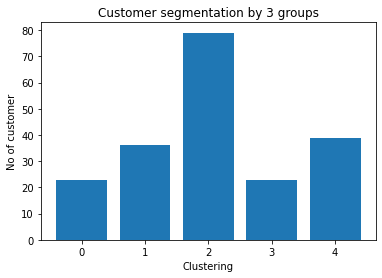

In [67]:
km = KMeans(n_clusters=5).fit(data)
y_km = km.fit_predict(data)
n_cluster, km_count = np.unique(y_km, return_counts=True)
plt.bar(n_cluster, km_count)
plt.ylabel('No of customer')
plt.xlabel('Clustering')
plt.title('Customer segmentation by 3 groups')

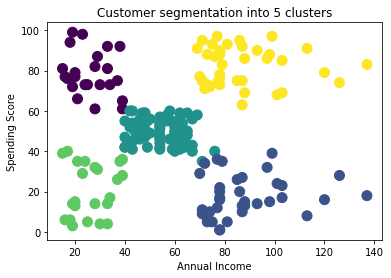

In [69]:
plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=y_km, s=100)


plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer segmentation into 5 clusters')

plt.show()